In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline


In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


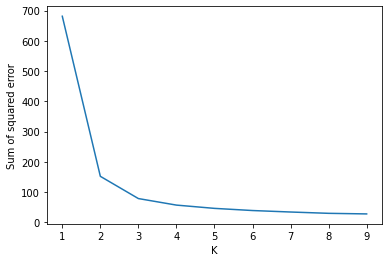

In [4]:
sse = []
km_range = range(1,10)
for k in km_range:
  km = KMeans(k)
  km.fit(df)
  sse.append(km.inertia_)


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(km_range,sse)

In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_prediction = km.fit_predict(df)
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
df['cluster'] = y_prediction
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [9]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df0.head(2)

,petal length (cm),petal width (cm),cluster
77,5.0,1.7,0
83,5.1,1.6,0


In [10]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

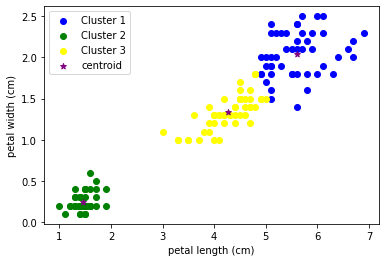

In [11]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'blue',label='Cluster 1')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green',label='Cluster 2')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'yellow',label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()